In [1]:
import pandas as pd 
import numpy as np

In [2]:
sales=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [4]:
sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
sales.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [3]:
sales.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
sales.shape

(200, 4)

In [4]:
sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
sales.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


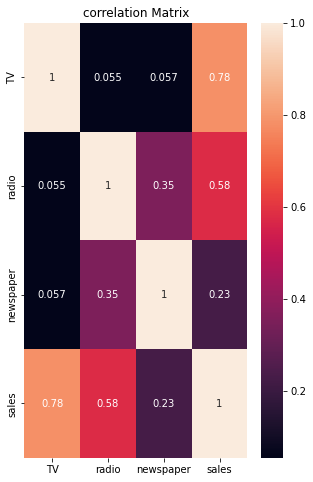

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
    
corr_mat=sales.corr().abs()
plt.figure(figsize=[5,8])
sns.heatmap(corr_mat,annot=True,annot_kws= {'size':10})
plt.title("correlation Matrix")
plt.show()

In [5]:
sales.drop(['newspaper'], axis=1, inplace=True)

In [17]:
sales

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [6]:
x=sales.drop(columns=['sales'])
y=sales['sales']

In [7]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [8]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=41)

In [11]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [12]:
dt.score(x_train,y_train)

1.0

In [13]:
y_pred=dt.predict(x_test)

In [14]:
y_pred

array([11.4, 14.2, 17. ,  9.5, 18.9, 11.4, 16.6,  6.9,  9.7,  7. , 19.8,
       18. , 10.9, 19.2, 12.3,  3.2, 11. , 16.9,  9.6, 20.2, 10.9, 17. ,
        9.7,  8.6,  9.7, 12.2, 18.5,  5.9, 25.4, 19.6,  8.8,  7. ,  5.9,
       20.2, 23.8,  9.5, 13.4, 19.8, 16.9,  8.8, 23.8, 22.4,  6.9, 14.6,
       17.2, 14.8,  7. , 12.2, 12.2,  9.6])